In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

In [102]:
data = pd.read_csv('profiles.csv')
data.head()
print(data['status'].value_counts())

status
single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: count, dtype: int64


In [103]:
test = 'test,'
if 'test' in test:
    print('yes')

yes


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

we want to look at the offspring column first

In [105]:
list = data['offspring'].value_counts()
list
data['want_kids'] = data['offspring'].replace({'doesn&rsquo;t have kids': 0,'doesn&rsquo;t have kids, but might want them':1,
'doesn&rsquo;t have kids, but wants them':1,
'doesn&rsquo;t want kids':0,
'has kids':1,'has a kid':1,'doesn&rsquo;t have kids, and doesn&rsquo;t want any':0,
'has kids, but doesn&rsquo;t want more':0,
'has a kid, but doesn&rsquo;t want more':0,'has a kid, and might want more':1,
'wants kids':1,'might want kids':1,'has kids, and might want more':1,
'has a kid, and wants more':1,'has kids, and wants more':1})

C:\Users\legom\AppData\Local\Temp\ipykernel_4068\1721873299.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['want_kids'] = data['offspring'].replace({'doesn&rsquo;t have kids': 0,'doesn&rsquo;t have kids, but might want them':1,


In [106]:
data['want_kids'].value_counts()

want_kids
0.0    12336
1.0    12049
Name: count, dtype: int64

In [107]:
#(data['height'].value_counts())

In [108]:
cols_to_drop = ['ethnicity','offspring','essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9','location','pets','last_online','speaks','sign','job']
data = data.drop(cols_to_drop, axis=1)

In [109]:
hot_encode = ['body_type','diet','drinks','drugs','education','orientation','religion','sex','smokes','status']
data=pd.get_dummies(data, columns=hot_encode, dtype=int)

In [110]:
data = data.dropna()
data.head()
#152 columns wow this might be hefty

,age,height,income,want_kids,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,...,smokes_no,smokes_sometimes,smokes_trying to quit,smokes_when drinking,smokes_yes,status_available,status_married,status_seeing someone,status_single,status_unknown
0,22,75.0,-1,1.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,35,70.0,80000,1.0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,23,71.0,20000,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5,29,67.0,-1,1.0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7,31,65.0,-1,1.0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [111]:
want_kids = ['want_kids']
train_features = [x for x in data if x not in want_kids]

In [112]:
X = torch.tensor(data[train_features].values, dtype=torch.float)
y = torch.tensor(data['want_kids'].values, dtype=torch.float).view(-1,1)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42) 

In [114]:
torch.manual_seed(42)

model = nn.Sequential(nn.Linear(134,70),nn.ReLU(),nn.Linear(70,35),nn.ReLU(),nn.Linear(35,1),nn.Sigmoid())

In [115]:
loss = nn.BCELoss()
optimizer = optim.Adam(model.parameters(),lr=0.05)

In [116]:
print(y_train)

tensor([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [1.],
        [0.]])


In [117]:
num_epochs = 9000
epoch = []
accuracy_list = []
for epochs in range(num_epochs):
    predictions = model(X_train)
    BCELoss = loss(predictions,y_train)
    BCELoss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if (epochs+1)%100 == 0:
        predicted_labels = (predictions >= .5).int()
        accuracy = accuracy_score(y_train,predicted_labels)
        epoch.append(epochs+1)
        accuracy_list.append(accuracy)
        if (epochs+1)%500 == 0:
            print(f'Epoch {(epochs+1)}/{num_epochs}, BCELoss {BCELoss.item()}, Accuracy {accuracy}')

Epoch 500/9000, BCELoss 11.231928825378418, Accuracy 0.631619418670221
Epoch 1000/9000, BCELoss 11.22912311553955, Accuracy 0.634900292202799
Epoch 1500/9000, BCELoss 11.228598594665527, Accuracy 0.6364382016711949
Epoch 2000/9000, BCELoss 11.227214813232422, Accuracy 0.6363356743733019
Epoch 2500/9000, BCELoss 11.22803020477295, Accuracy 0.6372584200543394
Epoch 3000/9000, BCELoss 11.228177070617676, Accuracy 0.6364894653201415
Epoch 3500/9000, BCELoss 11.22411060333252, Accuracy 0.6416670938637412
Epoch 4000/9000, BCELoss 11.22463607788086, Accuracy 0.6401804480442917
Epoch 4500/9000, BCELoss 11.221254348754883, Accuracy 0.6439226944173886
Epoch 5000/9000, BCELoss 11.226262092590332, Accuracy 0.6369508381606602
Epoch 5500/9000, BCELoss 11.219148635864258, Accuracy 0.6465371405136617
Epoch 6000/9000, BCELoss 11.219517707824707, Accuracy 0.6465371405136617
Epoch 6500/9000, BCELoss 11.219414710998535, Accuracy 0.6459219767263034
Epoch 7000/9000, BCELoss 11.222148895263672, Accuracy 0.64

In [118]:
model.eval()
with torch.no_grad():
    test_predictions = model(X_test)
    test_predicted_labels = (test_predictions>=0.5).int()

In [119]:
accuracy = accuracy_score(y_test,test_predicted_labels)
classification = classification_report(y_test,test_predicted_labels)
print(accuracy,classification)

0.5897067869591962               precision    recall  f1-score   support

         0.0       0.62      0.48      0.54      2450
         1.0       0.57      0.70      0.63      2427

    accuracy                           0.59      4877
   macro avg       0.60      0.59      0.58      4877
weighted avg       0.60      0.59      0.58      4877



Probably the biggest thing that is holding back the accuracy is removing the essay questions being answere. They provide much more insight into what the person is however it might require another ML model to decide if it helps with the person wanting kids.
Furthermore people that answered having kids but ignored wether or not they wanted kids were autolisted as not wanting kids. tweaking this may improve the accuracy

In [120]:
import matplotlib.pyplot as plt

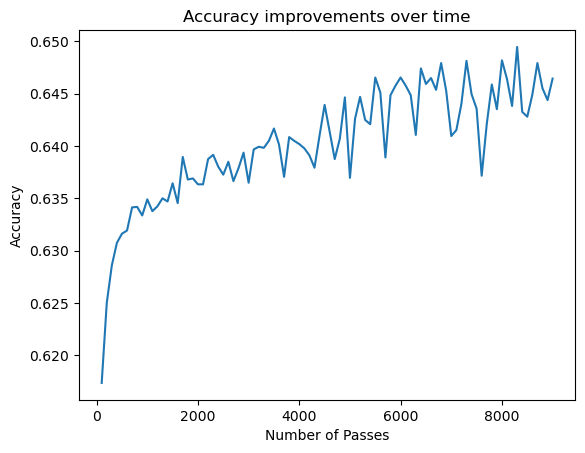

In [121]:
plt.plot(epoch,accuracy_list)
plt.xlabel('Number of Passes')
plt.ylabel('Accuracy')
plt.title('Accuracy improvements over time')
plt.show()